## Image Classification

**1. BUILDING A DATA PIPELINE**

**1.1 INSTALLING DEPENDENCIES**

In [55]:
import tensorflow as tf
import os #Can go and scan through folders and files
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [56]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

**1.2 REMOVE DODGY IMAGES**

In [57]:
import cv2      #OpenCV Library
import imghdr   #Returns type of Image
import matplotlib.pyplot as plt

In [58]:
data_dir = 'data'

In [59]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [60]:
os.listdir(data_dir)

['happy', 'sad']

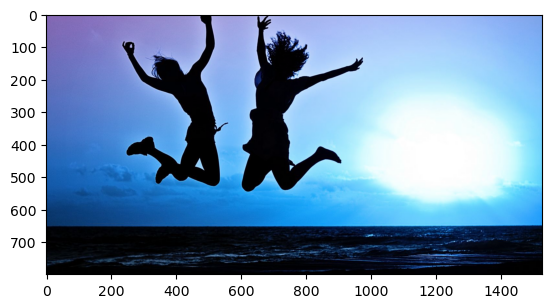

In [61]:
img = cv2.imread(os.path.join('data', 'happy', '_happy_jumping_on_beach-40815.jpg'))
img.shape
plt.imshow(img)
plt.show()

In [62]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image does not exist in Image extensions list {}'. format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with Image {}'.format(image_path))
            os.remove(image_path)

**1.3 LOAD DATA**

In [63]:
import numpy as np

In [64]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)
data

Found 170 files belonging to 2 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [65]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [66]:
batch = data_iterator.next()

In [67]:
batch[1]

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int32)

In [68]:
batch[0].shape

(32, 256, 256, 3)

**2. PREPROCESS DATA**

**2.1 SCALE DATA**

In [69]:
data = data.map(lambda x,y: (x/255, y))

In [70]:
scaled_iterator = data.as_numpy_iterator()

In [71]:
batch = scaled_iterator.next()

**2.2 SPLIT DATA**

In [72]:
len(data)

6

In [73]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1) + 1

In [74]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

**3. BUILDING THE DEEP NEURAL NETWORK**

**3.1 BUILD THE NETWORK**

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [76]:
model = Sequential()

In [77]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256, 256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten()) # 30x30x16 = 14400

model.add(Dense(256, activation = 'relu'))  #Fully Connected Layers (14400 * 256)
model.add(Dense(1, activation = 'sigmoid'))

In [86]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [87]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 16)      

**3.2 TRAIN**

In [88]:
log_dir = 'logs'

In [89]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [90]:
hist = model.fit(train, epochs=20, validation_data= val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 9s 2s/step - loss: 2.0296 - accuracy: 0.5000 - val_loss: 1.2398 - val_accuracy: 0.3438
Epoch 2/20
4/4 [==============================] - 6s 1s/step - loss: 0.9016 - accuracy: 0.4375 - val_loss: 0.6879 - val_accuracy: 0.7500
Epoch 3/20
4/4 [==============================] - 6s 1s/step - loss: 0.6680 - accuracy: 0.5938 - val_loss: 0.7100 - val_accuracy: 0.4375
Epoch 4/20
4/4 [==============================] - 6s 1s/step - loss: 0.6469 - accuracy: 0.5781 - val_loss: 0.6861 - val_accuracy: 0.5312
Epoch 5/20
4/4 [==============================] - 6s 1s/step - loss: 0.6544 - accuracy: 0.5547 - val_loss: 0.6092 - val_accuracy: 0.7188
Epoch 6/20
4/4 [==============================] - 7s 1s/step - loss: 0.6252 - accuracy: 0.6094 - val_loss: 0.6805 - val_accuracy: 0.4375
Epoch 7/20
4/4 [==============================] - 6s 1s/step - loss: 0.6047 - accuracy: 0.6094 - val_loss: 0.5302 - val_accuracy: 0.5938
Epoch 8/20
4/4 [=========================

**3.3 MODEL PERFORMANCE**

Plotting Training Loss and Validation Loss versus Epochs

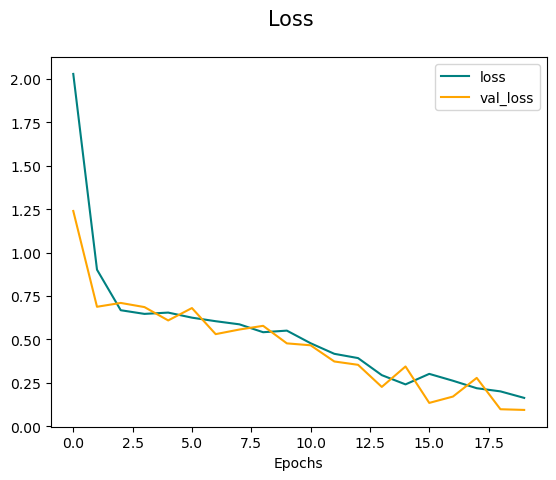

In [96]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 15)
plt.xlabel('Epochs')
plt.legend()
plt.show()

Plotting Training Accuracy and Validation Accuracy versus Epochs

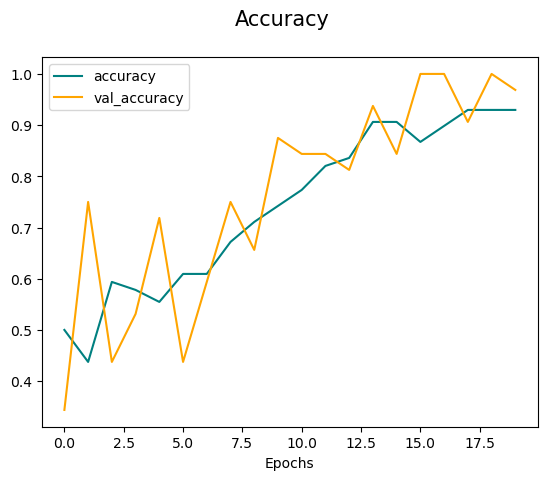

In [99]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 15)
plt.xlabel('Epochs')
plt.legend()
plt.show()

**4. EVALUATE PERFORMANCE**

**4.1 EVALUATE**

In [104]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [106]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [107]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 299ms/step


In [109]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

1.0 0.6 0.8


**4.2 TEST**

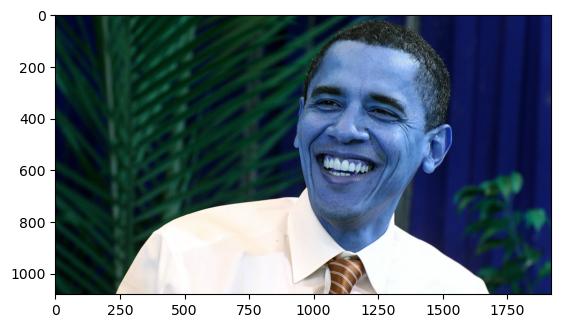

In [143]:
img = cv2.imread('data/happytest.jpg')
plt.imshow(img)
plt.show()

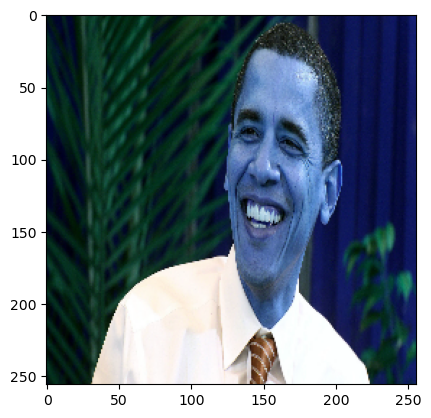

In [144]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [145]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 47ms/step


In [146]:
yhat

array([[0.22676519]], dtype=float32)

In [147]:
if yhat > 0.5:
    print('Predicted class is Sad :(')
else:
    print('Predicted class is Happy:)')


Predicted class is Happy:)


**5. SAVE THE MODEL**

In [148]:
model.save(os.path.join('models', 'happySadModel.h5'))